In [1]:
import numpy as np
import mdtraj as mdt
import MDAnalysis as mda

import matplotlib.pyplot as plt

In [2]:
#filepaths
trjpath = "/Users/asakalish/Desktop/Classes/BP 219/trajectories/"

ptopapo = f"{trjpath}DESRES-Trajectory_sarscov2-10875753-no-water-zinc-glueCA/sarscov2-10875753-no-water-zinc-glueCA/apo_top.pdb"
ptopholo = f"{trjpath}DESRES-Trajectory_sarscov2-10875754-no-water-zinc-glueCA/sarscov2-10875754-no-water-zinc-glueCA/holo_top.pdb"

ptrjapo  = f"{trjpath}DESRES-Trajectory_sarscov2-10875753-no-water-zinc-glueCA/sarscov2-10875753-no-water-zinc-glueCA/sarscov2-10875753-no-water-zinc-glueCA-0000.dcd"
ptrjholo = f"{trjpath}DESRES-Trajectory_sarscov2-10875754-no-water-zinc-glueCA/sarscov2-10875754-no-water-zinc-glueCA/sarscov2-10875754-no-water-zinc-glueCA-0000.dcd"

In [3]:
#load trajectories

trjapo = mdt.load_dcd(ptrjapo, top = ptopapo)
trjholo = mdt.load_dcd(ptrjholo, top = ptopholo)

In [4]:
trjapo

<mdtraj.Trajectory with 1000 frames, 9608 atoms, 600 residues, and unitcells at 0x7fbda2d4ff70>

(1000,)
(1000,)


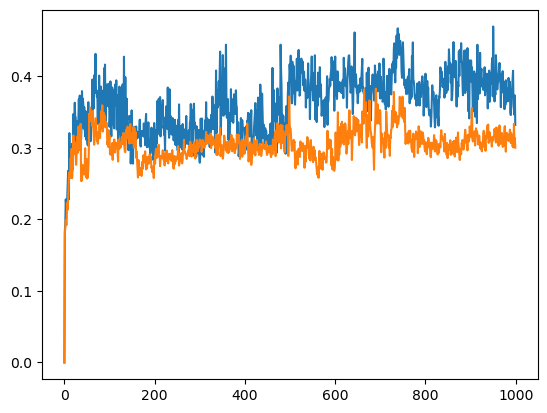

In [5]:
protein_sel1 = trjapo.topology.select('protein')
protein_traj1 = trjapo.atom_slice(protein_sel1)
rmsd1 = mdt.rmsd(protein_traj1, protein_traj1, 0)

protein_sel2 = trjholo.topology.select('protein')
protein_traj2 = trjholo.atom_slice(protein_sel2)
rmsd2 = mdt.rmsd(protein_traj2, protein_traj2, 0)

print(np.shape(rmsd1))
print(np.shape(rmsd2))

plt.plot(rmsd1)
plt.plot(rmsd2)

Text(0, 0.5, 'RMSD ($\\AA$)')

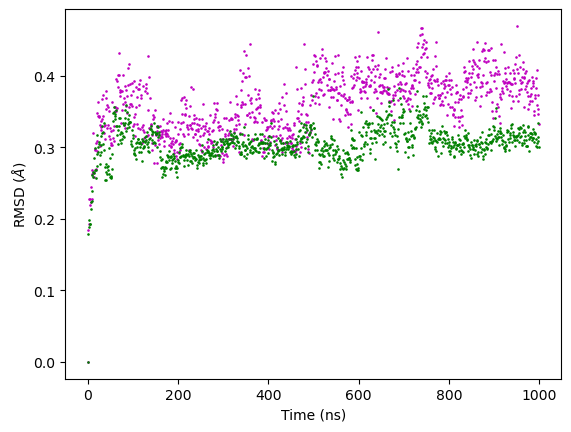

In [6]:
plt.scatter(np.arange(0, len(rmsd1)), rmsd1, marker='.', color='m', s=3, label='Apo')
plt.scatter(np.arange(0, len(rmsd2)), rmsd2, marker='.', color='g', s=3, label='Holo')

 ## what does np.arange do?
plt.xlabel('Time (ns)')
plt.ylabel('RMSD ($\AA$)')


In [7]:
#calculate RMSF of each atom

rmsf_apo = mdt.rmsf(trjapo, reference = None)
rmsf_holo = mdt.rmsf(trjholo, reference = None)

In [8]:
print(trjapo.top.select('resname NME'))

[9601 9602 9603 9604 9605 9606]


In [9]:
rmsf_apo

array([0.58006465, 0.5825383 , 0.6726105 , ..., 1.0089126 , 1.0091617 ,
       0.14726552], dtype=float32)

In [10]:
trjapo.topology

<mdtraj.Topology with 2 chains, 600 residues, 9608 atoms, 9632 bonds at 0x7fbd71399090>

In [11]:
table, bonds = trjapo.topology.to_dataframe()

In [12]:
trjapo.top

<mdtraj.Topology with 2 chains, 600 residues, 9608 atoms, 9632 bonds at 0x7fbd71399090>

In [13]:
trjapo.top.residue(0)

ACE18

In [14]:
print(trjapo.top.residue(0))

ACE18


In [15]:
trjapo.top.residue(0).atom

<bound method Residue.atom of ACE18>

In [16]:
rmsf = mdt.rmsf(trjapo, trjapo, 0)

In [17]:
print(np.shape(rmsf))

(9608,)


In [18]:
# print(trjapo.top.select('resid 1 to 200'))
print(trjapo.top.select('resname ALA'))

[  97   98   99  100  101  102  103  104  105  106  282  283  284  285
  286  287  288  289  290  291  437  438  439  440  441  442  443  444
  445  446  728  729  730  731  732  733  734  735  736  737  814  815
  816  817  818  819  820  821  822  823  961  962  963  964  965  966
  967  968  969  970 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320
 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2341 2342 2343 2344
 2345 2346 2347 2348 2349 2350 2804 2805 2806 2807 2808 2809 2810 2811
 2812 2813 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 3616 3617
 3618 3619 3620 3621 3622 3623 3624 3625 3687 3688 3689 3690 3691 3692
 3693 3694 3695 3696 3769 3770 3771 3772 3773 3774 3775 3776 3777 3778
 3960 3961 3962 3963 3964 3965 3966 3967 3968 3969 4469 4470 4471 4472
 4473 4474 4475 4476 4477 4478 4541 4542 4543 4544 4545 4546 4547 4548
 4549 4550 4587 4588 4589 4590 4591 4592 4593 4594 4595 4596 4714 4715
 4716 4717 4718 4719 4720 4721 4722 4723 5189 5190 5191 5192 5193 5194
 5195 

6


Text(0, 0.5, 'Count')

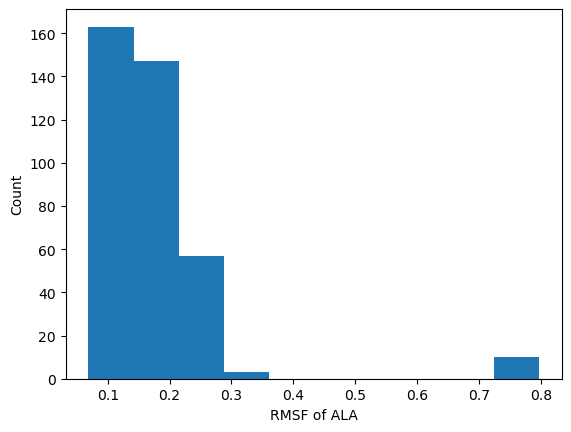

In [19]:
# okay finally
# so i need to figure out how to list all the possible 
# residue names so that i can loop over the rmsf for each
print(len(trjapo.top.select('resname NME')))

rmsf[trjapo.top.select('resname ALA')]

plt.hist(rmsf[trjapo.top.select('resname ALA')])
plt.xlabel('RMSF of ALA')
plt.ylabel('Count')

Text(0, 0.5, 'Mean RMSF')

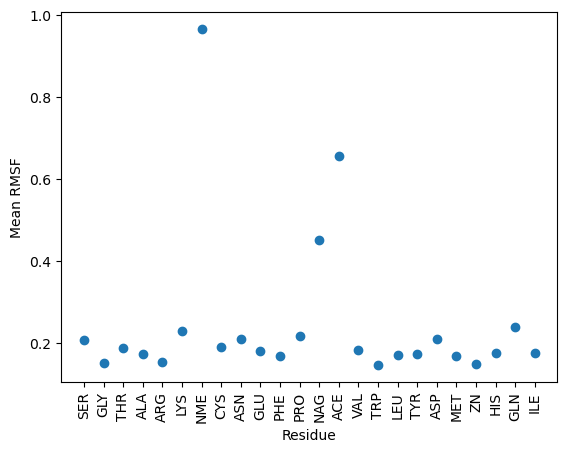

In [20]:
# try plotting mean rmsf for each amino acid

# get name of each residue, put in list
names = []
for res in trjapo.top.residues:
    names.append(res.name)

# remove repeat names and assign to names_f
names_f = list(set(names))
# init an array for rmsf by amino acid
rmsf_aa = []

for res in names_f:
    n = 'resname ' + res
    rmsf_aa.append(rmsf[trjapo.top.select(n)])


means = []
for i in range(0,len(rmsf_aa)):
    means.append(np.mean(rmsf_aa[i]))
    
plt.scatter(names_f, means);
plt.xticks(rotation = 90);

plt.xlabel('Residue')
plt.ylabel('Mean RMSF')

In [ ]:
# compute contacts
cc = mdt.compute_contacts(trjapo,'all')

In [ ]:
cc